# Seiya Iwama

## Research question/interests
Identify whether domestic inequality can be eliminated by making the country as a whole richer.

How much does the increase in wealth, especially in national income, tend to reduce inequality?

Will the rate of inequality in the country decrease as the country becomes richer?
Or, is it enough to simply make a country richer in order to eliminate domestic inequality?

# Analysis Pipeline
- [1. Load Data](#1-load-data)
- [2. Clean Data](#2-clean-data)
- [3. Process Data](#3-process-data)
- [4. Wrangle Data](#4-wrangle-data)

#### 1. Load Data
  * Load data from "data" folder.
  * Check each data frame by using "head()".
  * Print to check the number of rows and columns.
  * Check the column names of each dataframe with ".columns".

#### 2. Clean Data
  * df_AfricanDevelopment
      * Remove columns not being used
      * Check for missing values in the data frames by using "isnull().sum()" .
      * Deal with "inappropriate" data with "dropna()" to remove the row.
      * Visualizing the correlation between population of 2021 and HDI in the df_AfricanDevelopment data
  
  * df_country_variables
    * Load data. At that time, use "header=1" to eliminate the misalignment of column names.
    * Remove rows and columns not being used.
    * Use the variable "missing_columns" to remove unnecessary columns.
    * Remove all non-year elements from the column called "variable".
    * Replace "-" in the table by Nan.
    * Change each columns data type from "object" into "float64"
    * Deal with “incorrect” data.
      * Align the digits of the data by dividing the data from 2012 to 2015 by 10.

#### 3. Process Data
  * df_country_variables
    * Identify any years in which the average trend in global CPI values has changed significantly.
  * df_AfricanDevelopment
    * Determine the country data to be used in the following steps by sorting df_AfricanDevelopment by "humanDevelopmentIndex".
    * Choose those with discrete values.
  * df_cpi_xxyyzz
    * Conduct data processing for the four selected countries to make it easier to visualize the data.
  
#### 4. Wrangle Data
  * df_cpi_xxyyzz
    * Remove rows and columns not being used.
    * Use the variable "missing_columns_xxyyzz" to remove unnecessary columns.
    * Remove all-Nan row by using "dropna()".
    * Grasp the trend by visualizing the data that has been made easy to handle in the previous steps as a graph.

# Exploratory Data Analysis

In [208]:
# First, Import the libraries
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [209]:
# Load Data from "data" folder.

# pd.read_csv('../data/raw/xxx/yyy.csv')

df_cpi_Algeria = pd.read_csv('../data/raw/00cpi_xxxx/cpi_Algeria.csv')
df_WID_AD = pd.read_csv('../data/raw/00WID_data_00/WID_data_AD.csv', sep = ";")

df_AfricanDevelopment = pd.read_csv('../data/raw/AfricanDevelopment.csv')

df_data = pd.read_csv('../data/raw/archive/data.csv')
df_country_variables = pd.read_csv('../data/raw/cpi_variable_data/country_variable.csv')
df_WID_countries = pd.read_csv('../data/raw/WID_countries.csv', sep = ";")

In [210]:
df_cpi_Algeria.head(3) 

,Country,Algeria,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Variable,CPI,p90p100,p50p90,p0p50,p99p100,Nat Inc pAdult,Nat Inc pAdult,Nat Wealth pAdult,Wealth-Inc Ratio,10/50 Ratio,Pop,NaN
1,1998,-,0.4193,0.4205,0.1602,0.1149,12134.2987,13537.6496,56431.7889,4.650601864,NaN,NaN,NaN
2,1999,-,0.4163,0.4212,0.1625,0.1137,12032.6962,13492.098,56576.5125,4.701898098,NaN,NaN,NaN


In [211]:
df_WID_AD.head(3)

,country,variable,percentile,year,value,age,pop
0,AD,mptfrr999i,p0p100,1970,0.0,999,i
1,AD,mptfrr999i,p0p100,1971,0.0,999,i
2,AD,mptfrr999i,p0p100,1972,0.0,999,i


In [212]:
df_AfricanDevelopment.head(3)

,country,humanDevelopmentIndex,pop2021
0,Seychelles,0.801,98.908
1,Mauritius,0.796,1273.433
2,Algeria,0.759,44616.624


In [213]:
df_data.head(3)

,Jurisdiction,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,-,-,-,-,-,-,-,2.5,-,1.8,1.5,1.3,1.4,1.52,8,8,12,11
1,Albania,-,2.3,-,-,2.5,2.5,2.5,2.4,2.6,2.9,3.4,3.2,3.3,3.05,33,31,33,36
2,Algeria,-,-,-,-,-,2.6,2.7,2.8,3.1,3,3.2,2.8,2.9,2.9,34,36,36,36


In [214]:
df_country_variables.head(3)

,Country,Mauritius,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,Variable,CPI,p90p100,p50p90,p0p50,p99p100,Nat Inc pAdult,Nat Inc pAdult,Nat Wealth pAdult,Wealth-Inc Ratio,10/50 Ratio,Pop,NaN
1,1998,5,0.4578,0.3901,0.152,0.1374,12783.4058,13855.7675,51900.9383,4.060023785,NaN,NaN,
2,1999,4.9,0.4578,0.3901,0.152,0.1374,13690.6223,14101.1992,57756.4098,4.21868372,NaN,NaN,NaN


In [215]:
df_WID_countries.head(3)

,alpha2,titlename,shortname,region,region2
0,AM,Armenia,Armenia,Asia,Western Asia
1,AN,the Netherlands Antilles,Netherlands Antilles,Americas,Caribbean
2,AO,Angola,Angola,Africa,Middle Africa


### After looking at the data frames as described above, I assume that the following data frames can be used effectively.
- AfricanDevelopment.csv
- data.csv
- country_variable.csv

In [216]:
print('df_cpi_Algeria - The number of data is {}, the variables are {}.'.format(df_cpi_Algeria.shape[0], df_cpi_Algeria.shape[1]))
print('df_AfricanDevelopment - The number of data is {}, the variables are {}.'.format(df_AfricanDevelopment.shape[0], df_AfricanDevelopment.shape[1]))
print('df_data  - The number of data is {}, the variables are {}.'.format(df_data.shape[0], df_data.shape[1]))
print('df_country_variables  - The number of data is {}, the variables are {}.'.format(df_country_variables.shape[0], df_country_variables.shape[1]))

df_cpi_Algeria - The number of data is 24, the variables are 13.
df_AfricanDevelopment - The number of data is 49, the variables are 3.
df_data  - The number of data is 227, the variables are 19.
df_country_variables  - The number of data is 598, the variables are 13.


In [217]:
print(df_cpi_Algeria.columns)
print(df_AfricanDevelopment.columns)
print(df_data.columns)
print(df_country_variables.columns)

Index(['Country', 'Algeria', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')
Index(['country', 'humanDevelopmentIndex', 'pop2021'], dtype='object')
Index(['Jurisdiction', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015'],
      dtype='object')
Index(['Country', 'Mauritius', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12'],
      dtype='object')


### In the column, I found that I need to change the column names of df_country_variables and df_cpi_Algeria

### Check for missing values in the data frames.

In [218]:
df_AfricanDevelopment.isnull().sum()

country                  0
humanDevelopmentIndex    1
pop2021                  0
dtype: int64

I found one missing value in humanDevelopmentIndex.
In this case, since there is only one row of Nan value, I can determine that there is no problem dropping the entire row, so I drop it.

In [219]:
df_AfricanDevelopment = df_AfricanDevelopment.dropna()
df_AfricanDevelopment.isnull().sum()

country                  0
humanDevelopmentIndex    0
pop2021                  0
dtype: int64

Visualizing the correlation between population of 2021 and HDI in the df_AfricanDevelopment data

<AxesSubplot:xlabel='humanDevelopmentIndex', ylabel='pop2021'>

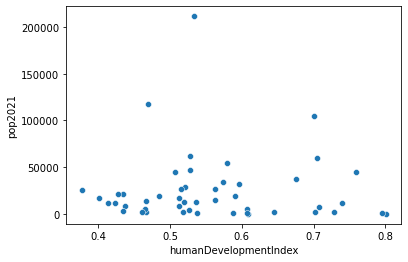

In [220]:
sns.scatterplot(x='humanDevelopmentIndex', y='pop2021', data=df_AfricanDevelopment)

### Analysis - The correlation between population of 2021 and HDI was found to be low.

In [221]:
df_country_variables = pd.read_csv('../data/raw/cpi_variable_data/country_variable.csv', header=1)
df_country_variables.head(3)

,Variable,CPI,p90p100,p50p90,p0p50,p99p100,Nat Inc pAdult,Nat Inc pAdult.1,Nat Wealth pAdult,Wealth-Inc Ratio,10/50 Ratio,Pop,Unnamed: 12
0,1998,5,0.4578,0.3901,0.152,0.1374,12783.4058,13855.7675,51900.9383,4.060023785,NaN,NaN,
1,1999,4.9,0.4578,0.3901,0.152,0.1374,13690.6223,14101.1992,57756.4098,4.21868372,NaN,NaN,NaN
2,2000,4.7,0.4578,0.3901,0.152,0.1374,14002.9229,14826.9775,61241.5769,4.373485088,NaN,NaN,NaN


In [222]:
df_country_variables.tail(27)

,Variable,CPI,p90p100,p50p90,p0p50,p99p100,Nat Inc pAdult,Nat Inc pAdult.1,Nat Wealth pAdult,Wealth-Inc Ratio,10/50 Ratio,Pop,Unnamed: 12
570,2018,2.7,0.4272,0.4178,0.155,0.1159,9798.785,10493.4946,46601.4367,4.755838394,NaN,NaN,NaN
571,2019,2.6,0.4272,0.4178,0.155,0.1159,9844.0407,10431.1536,46966.5726,4.771066189,NaN,NaN,NaN
572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
573,Country,Uganda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574,Variable,CPI,p90p100,p50p90,p0p50,p99p100,Nat Inc pAdult,Nat Inc pAdult,Nat Wealth pAdult,Wealth-Inc Ratio,10/50 Ratio,Pop,NaN
575,1998,2.6,0.5177,0.3555,0.1268,0.1803,2082.9199,2233.325,9657.5222,4.636530399,NaN,NaN,NaN
576,1999,2.2,0.5321,0.3462,0.1217,0.1936,2103.9676,2298.045,9775.8075,4.646368027,NaN,NaN,NaN
577,2000,2.3,0.5427,0.3386,0.1188,0.2046,2131.6092,2329.5856,10078.4924,4.728114605,NaN,NaN,NaN
578,2001,1.9,0.5533,0.3309,0.1158,0.2156,2201.4728,2420.7084,10467.473,4.754759312,NaN,NaN,NaN
579,2002,2.1,0.5639,0.3232,0.1129,0.2266,2322.5608,2532.9686,10937.9487,4.709434986,NaN,NaN,NaN


I could see the country names forming a line, as in line 573.
So I decided to check the missing values to exclude these lines.

In [223]:
df_country_variables.isnull().sum()

Variable              23
CPI                   23
p90p100               68
p50p90                68
p0p50                 68
p99p100               68
Nat Inc pAdult        68
Nat Inc pAdult.1      68
Nat Wealth pAdult     68
Wealth-Inc Ratio      68
10/50 Ratio          574
Pop                  558
Unnamed: 12          596
dtype: int64

From the above, the lines to be excluded were visualized.

In [224]:
missing_columns = ['10/50 Ratio', 'Pop', 'Unnamed: 12']
df_country_variables.drop(missing_columns, axis=1, inplace=True)

In [225]:
df_country_variables.tail(27)

,Variable,CPI,p90p100,p50p90,p0p50,p99p100,Nat Inc pAdult,Nat Inc pAdult.1,Nat Wealth pAdult,Wealth-Inc Ratio
570,2018,2.7,0.4272,0.4178,0.155,0.1159,9798.785,10493.4946,46601.4367,4.755838394
571,2019,2.6,0.4272,0.4178,0.155,0.1159,9844.0407,10431.1536,46966.5726,4.771066189
572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
573,Country,Uganda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
574,Variable,CPI,p90p100,p50p90,p0p50,p99p100,Nat Inc pAdult,Nat Inc pAdult,Nat Wealth pAdult,Wealth-Inc Ratio
575,1998,2.6,0.5177,0.3555,0.1268,0.1803,2082.9199,2233.325,9657.5222,4.636530399
576,1999,2.2,0.5321,0.3462,0.1217,0.1936,2103.9676,2298.045,9775.8075,4.646368027
577,2000,2.3,0.5427,0.3386,0.1188,0.2046,2131.6092,2329.5856,10078.4924,4.728114605
578,2001,1.9,0.5533,0.3309,0.1158,0.2156,2201.4728,2420.7084,10467.473,4.754759312
579,2002,2.1,0.5639,0.3232,0.1129,0.2266,2322.5608,2532.9686,10937.9487,4.709434986


In [226]:
df_country_variables.isnull().sum()

Variable             23
CPI                  23
p90p100              68
p50p90               68
p0p50                68
p99p100              68
Nat Inc pAdult       68
Nat Inc pAdult.1     68
Nat Wealth pAdult    68
Wealth-Inc Ratio     68
dtype: int64

In [227]:
# df_country_variables = df_country_variables.dropna()
df_country_variables = df_country_variables[df_country_variables['Variable'].astype(str).str.isdecimal()]
df_country_variables.tail(27)

,Variable,CPI,p90p100,p50p90,p0p50,p99p100,Nat Inc pAdult,Nat Inc pAdult.1,Nat Wealth pAdult,Wealth-Inc Ratio
567,2015,2.6,0.4508,0.4052,0.144,0.1286,10411.8236,11245.1641,49138.471,4.719487667
568,2016,2.8,0.4429,0.4094,0.1477,0.1244,10127.2106,10780.5057,47900.5273,4.729883194
569,2017,2.7,0.4351,0.4136,0.1513,0.1201,9883.828,10580.981,46870.9092,4.742182255
570,2018,2.7,0.4272,0.4178,0.155,0.1159,9798.785,10493.4946,46601.4367,4.755838394
571,2019,2.6,0.4272,0.4178,0.155,0.1159,9844.0407,10431.1536,46966.5726,4.771066189
575,1998,2.6,0.5177,0.3555,0.1268,0.1803,2082.9199,2233.325,9657.5222,4.636530399
576,1999,2.2,0.5321,0.3462,0.1217,0.1936,2103.9676,2298.045,9775.8075,4.646368027
577,2000,2.3,0.5427,0.3386,0.1188,0.2046,2131.6092,2329.5856,10078.4924,4.728114605
578,2001,1.9,0.5533,0.3309,0.1158,0.2156,2201.4728,2420.7084,10467.473,4.754759312
579,2002,2.1,0.5639,0.3232,0.1129,0.2266,2322.5608,2532.9686,10937.9487,4.709434986


In [228]:
df_data.head(3)

,Jurisdiction,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,-,-,-,-,-,-,-,2.5,-,1.8,1.5,1.3,1.4,1.52,8,8,12,11
1,Albania,-,2.3,-,-,2.5,2.5,2.5,2.4,2.6,2.9,3.4,3.2,3.3,3.05,33,31,33,36
2,Algeria,-,-,-,-,-,2.6,2.7,2.8,3.1,3,3.2,2.8,2.9,2.9,34,36,36,36


In [229]:
df_data.isnull().sum()

Jurisdiction    0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013            0
2014            0
2015            0
dtype: int64

In [230]:
# Turn "-" in the table into Nan
df_data = df_data.replace(['-'], np.nan)

In [231]:
df_data.tail()

,Jurisdiction,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
222,Viet Nam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,2.6,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,Yemen,NaN,NaN,NaN,NaN,NaN,2.6,2.4,2.7,2.6,2.5,2.3,2.1,2.2,2.08,23,18,19,18
224,Yugoslavia,3,2,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,Zambia,3.5,3.5,3.4,2.6,2.6,2.5,2.6,2.6,2.6,2.6,2.8,3,3,3.2,37,38,38,38
226,Zimbabwe,4.2,4.1,3,2.9,2.7,2.3,2.3,2.6,2.4,2.1,1.8,2.2,2.4,2.23,20,21,21,21


In [232]:
df_data.count()

Jurisdiction    227
1998             85
1999             99
2000             90
2001             91
2002            102
2003            133
2004            146
2005            159
2006            163
2007            180
2008            180
2009            180
2010            178
2011            183
2012            176
2013            177
2014            175
2015            168
dtype: int64

In [233]:
df_data.mean(numeric_only=True)

Series([], dtype: float64)

In [234]:
mean_df_data = df_data.mean()
mean_df_data

/var/folders/6r/wy6cqjq50_q5b67c52fmh8g00000gn/T/ipykernel_23041/1835862742.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mean_df_data = df_data.mean()


Series([], dtype: float64)

In [235]:
df_data.describe()

,Jurisdiction,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
count,227,85,99,90,91,102,133,146,159,163,180,180,180,178,183,176,177,175,168
unique,227,57,57,56,57,50,55,64,60,58,64,61,66,67,155,69,68,68,64
top,Afghanistan,3,2.6,3.5,2.9,2.7,2.5,2.3,2.6,2.6,2.1,3.6,2.8,2.1,2.69,34,28,38,36
freq,1,5,5,5,4,6,8,8,10,10,12,8,9,10,3,8,9,9,7


In [236]:
print(df_data.dtypes)

Jurisdiction    object
1998            object
1999            object
2000            object
2001            object
2002            object
2003            object
2004            object
2005            object
2006            object
2007            object
2008            object
2009            object
2010            object
2011            object
2012            object
2013            object
2014            object
2015            object
dtype: object


In [237]:
df_data_f = df_data.astype({'1998': 'float64', '1999': 'float64', 
                            '2000': 'float64', '2001': 'float64', 
                            '2002': 'float64', '2003': 'float64', 
                            '2004': 'float64', '2005': 'float64', 
                            '2006': 'float64', '2007': 'float64', 
                            '2008': 'float64', '2009': 'float64', 
                            '2010': 'float64', '2011': 'float64', 
                            '2012': 'float64', '2013': 'float64', 
                            '2014': 'float64', '2015': 'float64', })

In [238]:
print(df_data_f.dtypes)

Jurisdiction     object
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
dtype: object


In [239]:
df_data_f.head(10)

,Jurisdiction,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,1.8,1.5,1.3,1.4,1.52,8.0,8.0,12.0,11.0
1,Albania,NaN,2.3,NaN,NaN,2.5,2.5,2.5,2.4,2.6,2.9,3.4,3.2,3.3,3.05,33.0,31.0,33.0,36.0
2,Algeria,NaN,NaN,NaN,NaN,NaN,2.6,2.7,2.8,3.1,3.0,3.2,2.8,2.9,2.90,34.0,36.0,36.0,36.0
3,Angola,NaN,NaN,1.7,NaN,1.7,1.8,2.0,2.0,2.2,2.2,1.9,1.9,1.9,2.01,22.0,23.0,19.0,15.0
4,Argentina,3.0,3.0,3.5,3.5,2.8,2.5,2.5,2.8,2.9,2.9,2.9,2.9,2.9,3.00,35.0,34.0,34.0,32.0
5,Armenia,NaN,2.5,2.5,NaN,NaN,3.0,3.1,2.9,2.9,3.0,2.9,2.7,2.6,2.63,34.0,36.0,37.0,35.0
6,Australia,8.7,8.7,8.3,8.5,8.6,8.8,8.8,8.8,8.7,8.6,8.7,8.7,8.7,8.84,85.0,81.0,80.0,79.0
7,Austria,7.5,7.6,7.7,7.8,7.8,8.0,8.4,8.7,8.6,8.1,8.1,7.9,7.9,7.79,69.0,69.0,72.0,76.0
8,Azerbaijan,NaN,1.7,1.5,2.0,2.0,1.8,1.9,2.2,2.4,2.1,1.9,2.3,2.4,2.38,27.0,28.0,29.0,29.0
9,Bahamas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.29,71.0,71.0,71.0,NaN


In [240]:
# Align the digits of the data by dividing the data from 2012 to 2015 by 10.
df_data_f['2012'] =  df_data_f.apply(lambda x : (x['2012'] /10), axis=1)
df_data_f['2013'] =  df_data_f.apply(lambda x : (x['2013'] /10), axis=1)
df_data_f['2014'] =  df_data_f.apply(lambda x : (x['2014'] /10), axis=1)
df_data_f['2015'] =  df_data_f.apply(lambda x : (x['2015'] /10), axis=1)

In [241]:
df_data_f.head(3)

,Jurisdiction,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,1.8,1.5,1.3,1.4,1.52,0.8,0.8,1.2,1.1
1,Albania,NaN,2.3,NaN,NaN,2.5,2.5,2.5,2.4,2.6,2.9,3.4,3.2,3.3,3.05,3.3,3.1,3.3,3.6
2,Algeria,NaN,NaN,NaN,NaN,NaN,2.6,2.7,2.8,3.1,3.0,3.2,2.8,2.9,2.90,3.4,3.6,3.6,3.6


In [242]:
df_data_f.mean()

/var/folders/6r/wy6cqjq50_q5b67c52fmh8g00000gn/T/ipykernel_23041/2867754704.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_data_f.mean()


1998    4.887059
1999    4.604040
2000    4.758889
2001    4.761538
2002    4.557843
2003    4.223308
2004    4.163699
2005    4.077987
2006    4.091411
2007    3.993333
2008    4.022222
2009    4.031111
2010    4.007865
2011    4.029344
2012    4.326705
2013    4.265537
2014    4.318857
2015    4.257143
dtype: float64

In [243]:
df_data_f_float_only = df_data_f[df_data_f.columns[df_data_f.columns != 'Jurisdiction']]
df_data_f_float_only

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.5,NaN,1.8,1.5,1.3,1.4,1.52,0.8,0.8,1.2,1.1
1,NaN,2.3,NaN,NaN,2.5,2.5,2.5,2.4,2.6,2.9,3.4,3.2,3.3,3.05,3.3,3.1,3.3,3.6
2,NaN,NaN,NaN,NaN,NaN,2.6,2.7,2.8,3.1,3.0,3.2,2.8,2.9,2.90,3.4,3.6,3.6,3.6
3,NaN,NaN,1.7,NaN,1.7,1.8,2.0,2.0,2.2,2.2,1.9,1.9,1.9,2.01,2.2,2.3,1.9,1.5
4,3.0,3.0,3.5,3.5,2.8,2.5,2.5,2.8,2.9,2.9,2.9,2.9,2.9,3.00,3.5,3.4,3.4,3.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,2.6,2.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,NaN,NaN,NaN,NaN,NaN,2.6,2.4,2.7,2.6,2.5,2.3,2.1,2.2,2.08,2.3,1.8,1.9,1.8
224,3.0,2.0,1.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
225,3.5,3.5,3.4,2.6,2.6,2.5,2.6,2.6,2.6,2.6,2.8,3.0,3.0,3.20,3.7,3.8,3.8,3.8


Text(0, 0.5, 'CPI value')

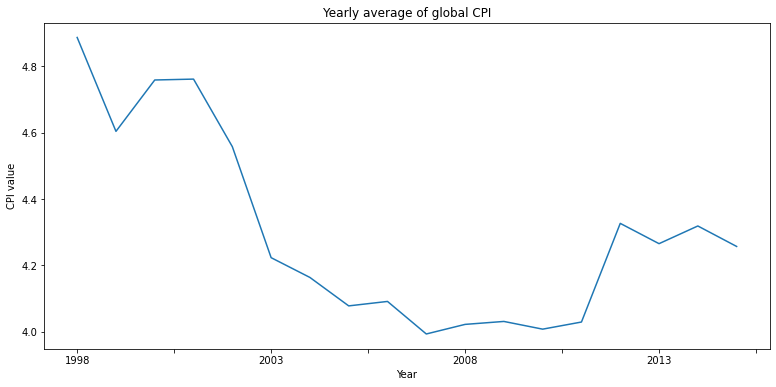

In [244]:
ax_data = df_data_f_float_only.mean().plot(figsize=(13, 6), title='Yearly average of global CPI')
ax_data.set_xlabel("Year")
ax_data.set_ylabel("CPI value")

## Analysis - The graph above shows that the global average CPI has not grown enough to have a significant impact year over year.   
## In other words, the CPI values do not vary much from year to year.

## Now that we know that there is not much variation from year to year, the next step is to decide which countries to study in depth, depending on the HDI value.

In [245]:
df_AfricanDevelopment_SORTED_by_HDI = df_AfricanDevelopment.sort_values('humanDevelopmentIndex', ascending=False)
df_AfricanDevelopment_SORTED_by_HDI.head()

,country,humanDevelopmentIndex,pop2021
0,Seychelles,0.801,98.908
1,Mauritius,0.796,1273.433
2,Algeria,0.759,44616.624
3,Tunisia,0.739,11935.766
4,Botswana,0.728,2397.241


In [246]:
df_AfricanDevelopment_SORTED_by_HDI.tail()

,country,humanDevelopmentIndex,pop2021
43,Mali,0.427,20855.735
44,Burundi,0.423,12255.433
45,South Sudan,0.413,11381.378
46,Chad,0.401,16914.985
47,Niger,0.377,25130.817


In [247]:
df_AfricanDevelopment_SORTED_by_HDI.describe()

,humanDevelopmentIndex,pop2021
count,48.000000,48.000000
mean,0.558271,25506.307125
std,0.109167,37199.264355
min,0.377000,98.908000
25%,0.469000,3347.936250
50%,0.531000,13386.878500
75%,0.608250,29253.528250
max,0.801000,211400.708000


## Analysis - Based on the above humanDevelopmentIndex data, I decided to take a deeper look at the four countries of 
### - Guinea, 
### - Nigeria, 
### - Congo, and 
### - Mauritius.

### These four countries have HDI values of about 25%, 50%, 75%, and almost maximum the 48 countries in this dataframe, respectively in this data frame.

In [248]:
df_cpi_guinea= pd.read_csv('../data/raw/00cpi_xxxx/cpi_guinea.csv',header=1)
df_cpi_guinea

,Variable,CPI,p90p100,p50p90,p0p50,p99p100,Nat Inc pAdult,Nat Inc pAdult.1,Nat Wealth pAdult,Wealth-Inc Ratio,10/50 Ratio,Pop,Unnamed: 12
0,1998.0,-,0.5116,0.3690,0.1187,0.1647,11624.5063,14144.7280,10356.1138,0.890886,NaN,NaN,NaN
1,1999.0,-,0.5136,0.3678,0.1179,0.1668,13773.5394,16917.9534,18031.7409,1.309158,NaN,NaN,NaN
2,2000.0,-,0.5156,0.3665,0.1190,0.1689,15300.3521,19003.0928,26445.7982,1.728444,NaN,NaN,NaN
3,2001.0,-,0.5124,0.3686,0.1198,0.1672,24271.8596,29693.3463,40917.3153,1.685792,NaN,NaN,NaN
4,2002.0,-,0.5096,0.3706,0.1207,0.1643,27524.9361,33781.7149,45517.7047,1.653690,NaN,NaN,NaN
5,2003.0,-,0.5065,0.3728,0.1208,0.1606,29655.2327,36536.1670,52778.4288,1.779734,NaN,NaN,NaN
6,2004.0,-,0.5055,0.3737,0.1147,0.1595,39183.8124,47758.5816,78389.0930,2.000548,NaN,NaN,NaN
7,2005.0,1.9,0.5206,0.3647,0.1151,0.1799,43431.3384,52796.3483,91283.0043,2.101777,NaN,NaN,NaN
8,2006.0,2.1,0.5191,0.3658,0.1155,0.1781,44596.8982,54191.4141,96386.6649,2.161286,NaN,NaN,NaN
9,2007.0,1.9,0.5176,0.3670,0.1157,0.1763,48575.5827,59348.9636,106050.3398,2.183203,NaN,NaN,NaN


In [249]:
df_cpi_guinea.isnull().sum()

Variable              1
CPI                   1
p90p100               1
p50p90                1
p0p50                 1
p99p100               1
Nat Inc pAdult        1
Nat Inc pAdult.1      1
Nat Wealth pAdult     1
Wealth-Inc Ratio      1
10/50 Ratio          23
Pop                  23
Unnamed: 12          23
dtype: int64

In [250]:
missing_columns_guinea = ['CPI', '10/50 Ratio', 'Pop', 'Unnamed: 12']
df_cpi_guinea.drop(missing_columns_guinea, axis=1, inplace=True)
df_cpi_guinea

,Variable,p90p100,p50p90,p0p50,p99p100,Nat Inc pAdult,Nat Inc pAdult.1,Nat Wealth pAdult,Wealth-Inc Ratio
0,1998.0,0.5116,0.3690,0.1187,0.1647,11624.5063,14144.7280,10356.1138,0.890886
1,1999.0,0.5136,0.3678,0.1179,0.1668,13773.5394,16917.9534,18031.7409,1.309158
2,2000.0,0.5156,0.3665,0.1190,0.1689,15300.3521,19003.0928,26445.7982,1.728444
3,2001.0,0.5124,0.3686,0.1198,0.1672,24271.8596,29693.3463,40917.3153,1.685792
4,2002.0,0.5096,0.3706,0.1207,0.1643,27524.9361,33781.7149,45517.7047,1.653690
5,2003.0,0.5065,0.3728,0.1208,0.1606,29655.2327,36536.1670,52778.4288,1.779734
6,2004.0,0.5055,0.3737,0.1147,0.1595,39183.8124,47758.5816,78389.0930,2.000548
7,2005.0,0.5206,0.3647,0.1151,0.1799,43431.3384,52796.3483,91283.0043,2.101777
8,2006.0,0.5191,0.3658,0.1155,0.1781,44596.8982,54191.4141,96386.6649,2.161286
9,2007.0,0.5176,0.3670,0.1157,0.1763,48575.5827,59348.9636,106050.3398,2.183203


In [251]:
# df_cpi_guinea = df_cpi_guinea[df_cpi_guinea['Variable'].astype(str).str.isdecimal()]
df_cpi_guinea.isnull().sum()

Variable             1
p90p100              1
p50p90               1
p0p50                1
p99p100              1
Nat Inc pAdult       1
Nat Inc pAdult.1     1
Nat Wealth pAdult    1
Wealth-Inc Ratio     1
dtype: int64

In [252]:
df_cpi_guinea = df_cpi_guinea.dropna()
df_cpi_guinea

,Variable,p90p100,p50p90,p0p50,p99p100,Nat Inc pAdult,Nat Inc pAdult.1,Nat Wealth pAdult,Wealth-Inc Ratio
0,1998.0,0.5116,0.3690,0.1187,0.1647,11624.5063,14144.7280,10356.1138,0.890886
1,1999.0,0.5136,0.3678,0.1179,0.1668,13773.5394,16917.9534,18031.7409,1.309158
2,2000.0,0.5156,0.3665,0.1190,0.1689,15300.3521,19003.0928,26445.7982,1.728444
3,2001.0,0.5124,0.3686,0.1198,0.1672,24271.8596,29693.3463,40917.3153,1.685792
4,2002.0,0.5096,0.3706,0.1207,0.1643,27524.9361,33781.7149,45517.7047,1.653690
5,2003.0,0.5065,0.3728,0.1208,0.1606,29655.2327,36536.1670,52778.4288,1.779734
6,2004.0,0.5055,0.3737,0.1147,0.1595,39183.8124,47758.5816,78389.0930,2.000548
7,2005.0,0.5206,0.3647,0.1151,0.1799,43431.3384,52796.3483,91283.0043,2.101777
8,2006.0,0.5191,0.3658,0.1155,0.1781,44596.8982,54191.4141,96386.6649,2.161286
9,2007.0,0.5176,0.3670,0.1157,0.1763,48575.5827,59348.9636,106050.3398,2.183203


In [253]:
df_cpi_guinea.columns

Index(['Variable', 'p90p100', 'p50p90', 'p0p50', 'p99p100', 'Nat Inc pAdult',
       'Nat Inc pAdult.1', 'Nat Wealth pAdult', 'Wealth-Inc Ratio'],
      dtype='object')

Text(0, 0.5, 'Wealth-Inc Ratio')

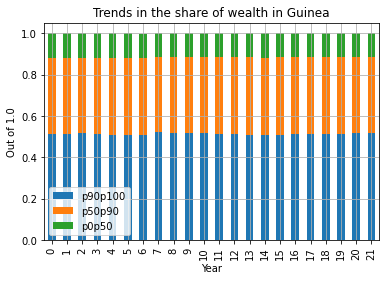

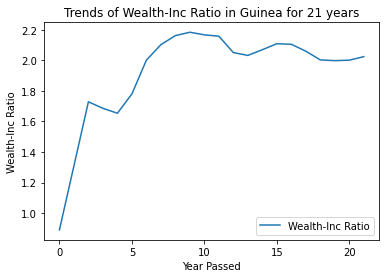

In [254]:
# Create a graph describing Guinea.
df_cpi_guinea_plot1 = df_cpi_guinea.drop(['Variable', 'p99p100', 'Nat Inc pAdult', 'Nat Inc pAdult.1', 'Nat Wealth pAdult'], axis=1)
df_cpi_guinea_plot1_wo_WI_ratio = df_cpi_guinea.drop(['Variable', 'p99p100', 'Nat Inc pAdult', 'Nat Inc pAdult.1', 'Nat Wealth pAdult','Wealth-Inc Ratio'], axis=1)
ax_guinea1 = df_cpi_guinea_plot1_wo_WI_ratio.plot.bar(title='Trends in the share of wealth in Guinea',grid=True,stacked=True)
ax_guinea1.set_xlabel("Year")
ax_guinea1.set_ylabel("Out of 1.0")

ax_guinea2 = df_cpi_guinea_plot1.plot(y='Wealth-Inc Ratio', kind="line", title='Trends of Wealth-Inc Ratio in Guinea for 21 years')
ax_guinea2.set_xlabel("Year Passed")
ax_guinea2.set_ylabel("Wealth-Inc Ratio")

## Analysis - According to the graph above, the national wealth income ratio has fluctuated greatly, even though the percentage of wealth share has hardly changed in the case of Guinea.

### The national wealth income ratio, also known as ICOR, is generally considered to be a measure of the inefficiency with which capital is used.

### In other words, even though the share of wealth has not changed, there has been a very large movement in indicators of inefficient use of capital in general.

## Compared with my research question, it seems that there is no correlation between the share of wealth and the efficiency of capital use in general.

In [255]:
df_cpi_nigeria= pd.read_csv('../data/raw/00cpi_xxxx/cpi_nigeria.csv',header=1)
missing_columns_nigeria = ['CPI', '10/50 Ratio', 'Pop', 'Unnamed: 12']
df_cpi_nigeria.drop(missing_columns_nigeria, axis=1, inplace=True)
df_cpi_nigeria = df_cpi_nigeria.dropna()
df_cpi_nigeria

,Variable,p90p100,p50p90,p0p50,p99p100,Nat Inc pAdult,Nat Inc pAdult.1,Nat Wealth pAdult,Wealth-Inc Ratio
0,1998.0,0.4649,0.4091,0.1260,0.1252,5817.0503,6090.7987,22702.6587,3.902778
1,1999.0,0.4644,0.4078,0.1277,0.1274,5501.6423,5956.1119,20982.3088,3.813827
2,2000.0,0.4639,0.4066,0.1295,0.1295,5603.2142,6079.0929,21144.1549,3.773576
3,2001.0,0.4634,0.4053,0.1313,0.1316,5822.4609,6274.5068,22685.6353,3.896228
4,2002.0,0.4629,0.4040,0.1330,0.1337,6611.4841,7047.3080,26738.0065,4.044177
5,2003.0,0.4624,0.4028,0.1348,0.1358,6886.6742,7364.7274,28149.9669,4.087600
6,2004.0,0.4683,0.3990,0.1327,0.1389,7212.3996,7831.2405,30171.9474,4.183344
7,2005.0,0.4742,0.3952,0.1306,0.1419,7573.7472,8111.7107,32682.7914,4.315274
8,2006.0,0.4800,0.3914,0.1286,0.1449,7864.3024,8386.7653,34976.5311,4.447506
9,2007.0,0.4859,0.3876,0.1265,0.1479,7884.6984,8709.0440,35920.7898,4.555760


Text(0, 0.5, 'Wealth-Inc Ratio')

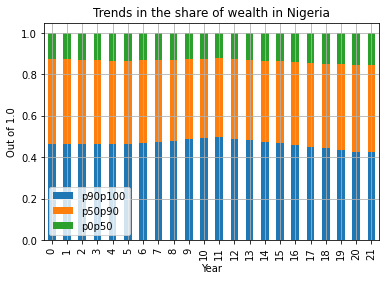

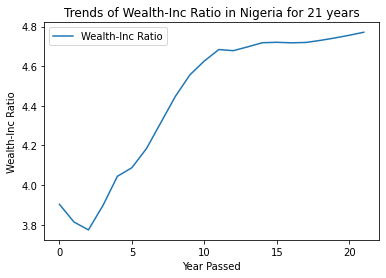

In [256]:
# Create a graph describing Guinea.
df_cpi_nigeria_plot1 = df_cpi_nigeria.drop(['Variable', 'p99p100', 'Nat Inc pAdult', 'Nat Inc pAdult.1', 'Nat Wealth pAdult'], axis=1)
df_cpi_nigeria_plot1_wo_WI_ratio = df_cpi_nigeria.drop(['Variable', 'p99p100', 'Nat Inc pAdult', 'Nat Inc pAdult.1', 'Nat Wealth pAdult','Wealth-Inc Ratio'], axis=1)
ax_nigeria1 = df_cpi_nigeria_plot1_wo_WI_ratio.plot.bar(title='Trends in the share of wealth in Nigeria',grid=True,stacked=True)
ax_nigeria1.set_xlabel("Year")
ax_nigeria1.set_ylabel("Out of 1.0")

ax_nigeria2 = df_cpi_nigeria_plot1.plot(y='Wealth-Inc Ratio', kind="line", title='Trends of Wealth-Inc Ratio in Nigeria for 21 years')
ax_nigeria2.set_xlabel("Year Passed")
ax_nigeria2.set_ylabel("Wealth-Inc Ratio")

### Analysis - The graph above shows that in the case of Nigeria, as in Guinea, even though the National Wealth Income Ratio has fluctuated significantly, the share of wealth has remained largely unchanged.

### In about 15 years, the national wealth-income ratio, which is considered an indicator of inefficient use of capital, has deteriorated significantly from 3.8 to 4.8. That's a 20 percent deterioration.



### This means that even though the share of wealth has not changed, there has been a very large movement in the overall index of inefficient use of capital.

### Again, compared to my research question, there seems to be no correlation between the wealth share and the overall efficiency of capital use.

In [257]:
df_cpi_congo= pd.read_csv('../data/raw/00cpi_xxxx/cpi_congo.csv',header=1)
missing_columns_congo = ['CPI', '10/50 Ratio', 'Pop', 'Unnamed: 12']
df_cpi_congo.drop(missing_columns_congo, axis=1, inplace=True)
df_cpi_congo = df_cpi_congo.dropna()
df_cpi_congo

,Variable,p90p100,p50p90,p0p50,p99p100,Nat Inc pAdult,Nat Inc pAdult.1,Nat Wealth pAdult,Wealth-Inc Ratio
0,1998.0,0.5453,0.3508,0.1039,0.1858,5537.0836,7890.9680,20779.1843,3.752731
1,1999.0,0.5453,0.3508,0.1039,0.1858,4623.3817,7419.2887,17635.2056,3.814352
2,2000.0,0.5453,0.3508,0.1039,0.1858,4651.5252,7706.5109,19882.5542,4.274416
3,2001.0,0.5453,0.3508,0.1039,0.1858,4775.0481,7746.5766,19971.2592,4.182421
4,2002.0,0.5453,0.3508,0.1039,0.1858,4521.6139,7845.6356,18982.1800,4.198099
5,2003.0,0.5453,0.3508,0.1039,0.1858,5221.8319,7656.9612,22676.2140,4.342578
6,2004.0,0.5453,0.3508,0.1039,0.1858,4936.2058,7663.9585,21745.3699,4.405280
7,2005.0,0.5453,0.3508,0.1031,0.1858,4756.8181,7980.6179,21415.3146,4.502025
8,2006.0,0.5477,0.3493,0.1023,0.1890,5238.1846,8309.0300,24214.9850,4.622782
9,2007.0,0.5500,0.3477,0.1015,0.1923,4997.4003,7475.1340,23364.7736,4.675385


Text(0, 0.5, 'Wealth-Inc Ratio')

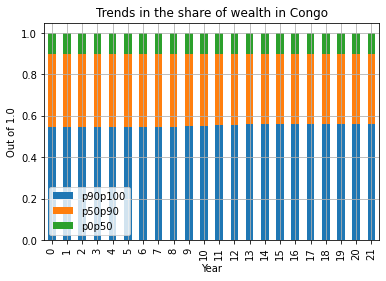

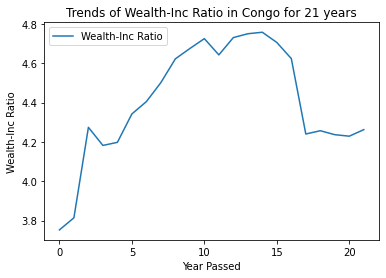

In [258]:
# Create a graph describing Guinea.
df_cpi_congo_plot1 = df_cpi_congo.drop(['Variable', 'p99p100', 'Nat Inc pAdult', 'Nat Inc pAdult.1', 'Nat Wealth pAdult'], axis=1)
df_cpi_congo_plot1_wo_WI_ratio = df_cpi_congo.drop(['Variable', 'p99p100', 'Nat Inc pAdult', 'Nat Inc pAdult.1', 'Nat Wealth pAdult','Wealth-Inc Ratio'], axis=1)
ax_congo1 = df_cpi_congo_plot1_wo_WI_ratio.plot.bar(title='Trends in the share of wealth in Congo',grid=True,stacked=True)
ax_congo1.set_xlabel("Year")
ax_congo1.set_ylabel("Out of 1.0")

ax_congo2 = df_cpi_congo_plot1.plot(y='Wealth-Inc Ratio', kind="line", title='Trends of Wealth-Inc Ratio in Congo for 21 years')
ax_congo2.set_xlabel("Year Passed")
ax_congo2.set_ylabel("Wealth-Inc Ratio")

### Analysis - The graph above shows that in the case of Congo, as with the previous two countries, even though the National Wealth Income Ratio has fluctuated significantly, the share of wealth has remained largely unchanged.

### In about 15 years, the national wealth-income ratio, which is considered an indicator of inefficient use of capital, has deteriorated significantly from 3.8 to 4.8. That's a 20 percent deterioration. In 2014, that value improved to 4.2, and it has held for the last five years!


### What we can see in this country is that despite the improvement in the once deteriorating Wealth-Inc ratio index, there is absolutely no change in the share of wealth in this country.

### Again, compared to my research question, there seems to be no correlation between the wealth share and the overall efficiency of capital use. This data seems to support my conclusions in a different way from the previous two countries.

In [259]:
df_cpi_mauritius= pd.read_csv('../data/raw/00cpi_xxxx/cpi_mauritius.csv',header=1)
missing_columns_mauritius = ['CPI', '10/50 Ratio', 'Pop', 'Unnamed: 12']
df_cpi_mauritius.drop(missing_columns_mauritius, axis=1, inplace=True)
df_cpi_mauritius = df_cpi_mauritius.dropna()
df_cpi_mauritius

,Variable,p90p100,p50p90,p0p50,p99p100,Nat Inc pAdult,Nat Inc pAdult.1,Nat Wealth pAdult,Wealth-Inc Ratio
0,1998.0,0.4578,0.3901,0.1520,0.1374,12783.4058,13855.7675,51900.9383,4.060024
1,1999.0,0.4578,0.3901,0.1520,0.1374,13690.6223,14101.1992,57756.4098,4.218684
2,2000.0,0.4578,0.3901,0.1520,0.1374,14002.9229,14826.9775,61241.5769,4.373485
3,2001.0,0.4578,0.3901,0.1520,0.1374,14514.1506,15197.6426,66289.7585,4.567250
4,2002.0,0.4578,0.3901,0.1520,0.1374,15420.4451,15329.9491,83515.9722,5.415926
5,2003.0,0.4578,0.3901,0.1520,0.1374,16528.3231,16352.6022,100961.2035,6.108375
6,2004.0,0.4578,0.3901,0.1520,0.1374,17623.7730,17111.8549,116439.9752,6.606984
7,2005.0,0.4578,0.3901,0.1520,0.1374,18699.1575,17256.2443,137877.6100,7.373466
8,2006.0,0.4578,0.3901,0.1520,0.1374,20726.5582,17804.3692,165375.3690,7.978911
9,2007.0,0.4643,0.3857,0.1501,0.1429,22809.3805,18402.8089,198724.8147,8.712418


Text(0, 0.5, 'Wealth-Inc Ratio')

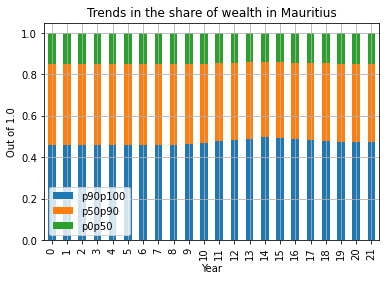

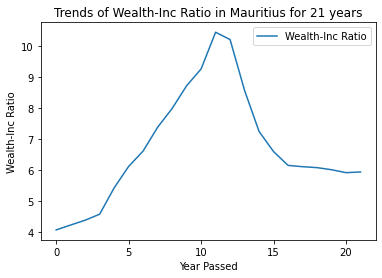

In [260]:
# Create a graph describing Guinea.
df_cpi_mauritius_plot1 = df_cpi_mauritius.drop(['Variable', 'p99p100', 'Nat Inc pAdult', 'Nat Inc pAdult.1', 'Nat Wealth pAdult'], axis=1)
df_cpi_mauritius_plot1_wo_WI_ratio = df_cpi_mauritius.drop(['Variable', 'p99p100', 'Nat Inc pAdult', 'Nat Inc pAdult.1', 'Nat Wealth pAdult','Wealth-Inc Ratio'], axis=1)
ax_mauritius1 = df_cpi_mauritius_plot1_wo_WI_ratio.plot.bar(title='Trends in the share of wealth in Mauritius',grid=True,stacked=True)
ax_mauritius1.set_xlabel("Year")
ax_mauritius1.set_ylabel("Out of 1.0")

ax_mauritius2 = df_cpi_mauritius_plot1.plot(y='Wealth-Inc Ratio', kind="line", title='Trends of Wealth-Inc Ratio in Mauritius for 21 years')
ax_mauritius2.set_xlabel("Year Passed")
ax_mauritius2.set_ylabel("Wealth-Inc Ratio")

### Analysis - The graph above shows that in the case of Mauritius, as with the other three countries, even though the National Wealth Income Ratio has fluctuated significantly, the share of wealth has remained largely unchanged.

### Over approximately 11 years, a rate more rapid than in the Congo, the national wealth-income ratio, a measure of inefficient use of capital, deteriorated significantly from 4 to 10. Three years later, in 2014, that value improved to 6.1, and it has continued to improve, albeit modestly, over the past five years.


### What we can see in this country is that despite the improvement in the once deteriorating Wealth-Inc ratio index, there is absolutely no change in the share of wealth in this country.

### Again, compared to my research question, there seems to be no correlation between the share of wealth and the overall efficiency of capital use. This data is an even more distinctive result than the post-on case, and seems to support my conclusion.
